In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

import os
import numpy as np
import seaborn as sns

plt.subplots_adjust(hspace=0.5)
plt.rcParams.update({'font.size': 13})

<Figure size 432x288 with 0 Axes>

In [35]:
csv_path1 = '/home/elliot/Documents/CVPR_2020/BFA_defense/BFA_defense/save/2020-02-06/cifar10_resnet20_quan_attack_noidx/attack_profile_8369.csv'
csv_path2 = '/home/elliot/Documents/CVPR_2020/BFA_defense/BFA_defense/save/2020-02-07/cifar10_resnet20_bin_attack_noidx2/attack_profile_7836.csv'

df1 = pd.read_csv(csv_path1, index_col=False)
df2 = pd.read_csv(csv_path2, index_col=False)

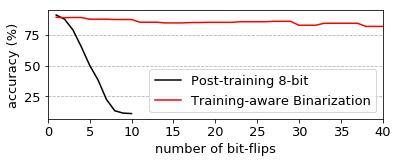

In [49]:
fig, ax = plt.subplots(figsize=(6,2))
sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df1, label='Post-training 8-bit ',color="black")
sns.lineplot(x='bit-flip idx', y='validation accuracy', data=df2, label='Training-aware Binarization', color="red")
plt.xlim(0,40)
plt.grid(True, 'major', 'y', ls='--', lw=0.8, c='k', alpha=.3)
plt.ylabel('accuracy (%)')
plt.xlabel('number of bit-flips')

plt.savefig('./acc_bitflips.pdf', bbox_inches="tight")

In [25]:
import torch
def int2bin(input, num_bits):
    '''
    convert the signed integer value into unsigned integer (2's complement equivalently).
    '''
    output = input.clone()
    output[input.lt(0)] = 2**num_bits + output[input.lt(0)]
    return output

input = torch.Tensor([-1])
int2bin(input,1)

tensor([1.])